In [8]:
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
path = r"C:\Users\aboub\Downloads\FuelConsumptionCo2.csv"

In [11]:
data = pd.read_csv(path)

In [15]:
cdf = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [18]:
mask = np.random.rand(len(data)) < 0.8
train = cdf[mask]
test = cdf[~mask]

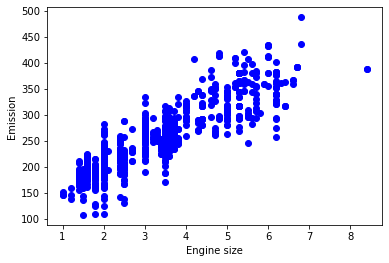

In [19]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [25]:
regression = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x,y)
print('Coefficients:', regression.coef_)
print ('Intercept:', regression.intercept_)

Coefficients: [[11.73903504  7.43089664  9.36614116]]
Intercept: [65.4786206]


In [28]:
y_hat= regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(f"Residual sum of squares: {np.mean((y_hat - y) ** 2)}")

# Explained variance score: 1 is perfect prediction
print(f"Variance score: {regression.score(x, y)}")

Residual sum of squares: 537.45445139426
Variance score: 0.8527995716163643


In [32]:
regression = linear_model.LinearRegression()
x2 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y2 = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x2,y2)
print('Coefficients:', regression.coef_)
print ('Intercept:', regression.intercept_)

Coefficients: [[11.76045971  7.33285302  3.87118877  5.41001713]]
Intercept: [65.82025805]


In [34]:
y_hat2 = regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
x2 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y2 = np.asanyarray(test[['CO2EMISSIONS']])
print(f"Variance score: {regression.score(x2, y2)}")

Variance score: 0.8532103609172772
